## WEBSCRAPING AND DATA ANALYSIS 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
URL = 'https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001'

In [4]:
page = requests.get(URL)

In [5]:
page.status_code

200

In [6]:
pagecontent = page.text

In [7]:
pagecontent

'<!DOCTYPE html>\n\n<html lang="en">\n\n<head>\n    <link rel="preconnect" href="//www.googleoptimize.com" />\n    <link rel="preconnect" href="//www.googletagmanager.com" />\n    <link rel="preconnect" href="//www.google-analytics.com" />\n    <link rel="preconnect" href="//connect.facebook.net" />\n    <link rel="preconnect" href="//cdn.jsdelivr.net" />\n    <link rel="preconnect" href="//widgets.getsitecontrol.com" />\n    <link rel="preconnect" href="//s.yimg.com" />\n    <link rel="preconnect" href="//www.googleadservices.com" />\n    <link rel="preconnect" href="//d2r1yp2w7bby2u.cloudfront.net" /><meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" />\n  <meta property="fb:app_id" content="697234207046254" /><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/amp/" 

In [8]:
soup = BeautifulSoup(pagecontent)

In [9]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<link href="//www.googleoptimize.com" rel="preconnect"/>
<link href="//www.googletagmanager.com" rel="preconnect"/>
<link href="//www.google-analytics.com" rel="preconnect"/>
<link href="//connect.facebook.net" rel="preconnect"/>
<link href="//cdn.jsdelivr.net" rel="preconnect"/>
<link href="//widgets.getsitecontrol.com" rel="preconnect"/>
<link href="//s.yimg.com" rel="preconnect"/>
<link href="//www.googleadservices.com" rel="preconnect"/>
<link href="//d2r1yp2w7bby2u.cloudfront.net" rel="preconnect"/><meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="697234207046254" property="fb:app_id"/><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/amp/" rel="amphtml"/><script data-react-helmet="true" type="text/javascrip

In [10]:
soup.find_all('div', attrs={'class':'_1l4fi'})

[<div class="_1l4fi"><div class="_15rKe"><div class="_1jpRU"><h2 class="_3FpCg">2012 Maruti Swift</h2><p class="cvakB">ZDI<!-- --> <span>Manual</span></p></div></div><ul class="bVR0c"><li>78,819 km</li><li>2nd Owner</li><li>Diesel</li></ul><div class="_19zc5"><div class="_2HFRN"><strong>₹10,604/month</strong></div><div class="_7udZZ"><span>₹476,699</span></div></div><div class="JvSRy"><span class="_3X7mV _2H07I">Zero downpayment</span></div></div>,
 <div class="_1l4fi"><div class="_15rKe"><div class="_1jpRU"><h2 class="_3FpCg">2016 Renault Kwid</h2><p class="cvakB">1.0 RXT<!-- --> <span>Manual</span></p></div></div><ul class="bVR0c"><li>20,445 km</li><li>1st Owner</li><li>Petrol</li></ul><div class="_19zc5"><div class="_2HFRN"><strong>₹7,427/month</strong></div><div class="_7udZZ"><span>₹333,899</span></div></div><div class="JvSRy"><span class="_3X7mV _2H07I">Zero downpayment</span></div></div>,
 <div class="_1l4fi"><div class="_15rKe"><div class="_1jpRU"><h2 class="_3FpCg">2018 Volksw

In [11]:
for x in soup.find_all('ul', attrs={'class':'bVR0c'}) : 
    print(x.text)

78,819 km2nd OwnerDiesel
20,445 km1st OwnerPetrol
65,235 km1st OwnerPetrol
47,264 km1st OwnerPetrol
103,354 km1st OwnerPetrol
65,571 km2nd OwnerPetrol
45,313 km1st OwnerPetrol
40,139 km1st OwnerDiesel
35,019 km1st OwnerPetrol
29,553 km2nd OwnerPetrol
55,088 km1st OwnerPetrol
75,366 km2nd OwnerPetrol
41,934 km1st OwnerPetrol
5,634 km1st OwnerPetrol
31,425 km1st OwnerPetrol
29,061 km1st OwnerPetrol
234,695 km1st OwnerPetrol
81,477 km2nd OwnerDiesel
41,432 km1st OwnerPetrol
39,789 km1st OwnerPetrol


In [12]:
for x in soup.find_all('h2', attrs={'class':'_3FpCg'}) : 
    print(x.text)

2012 Maruti Swift
2016 Renault Kwid
2018 Volkswagen Ameo
2017 Skoda Octavia
2016 Maruti Baleno
2015 Honda Jazz
2018 Maruti IGNIS
2020 Hyundai VENUE
2020 Maruti Ciaz
2017 Maruti Swift
2018 Maruti IGNIS
2017 Honda Jazz
2014 Maruti Swift
2020 Ford Ecosport
2018 Renault Kwid
2018 Renault Kwid
2015 Maruti Alto K10
2018 Maruti Vitara Brezza
2019 Maruti Alto
2016 Maruti Wagon R 1.0


In [13]:
for x in soup.find_all('div', attrs={'class':'_7udZZ'}) : 
    print(x.text)

₹476,699
₹333,899
₹621,899
₹1,305,499
₹621,899
₹524,199
₹564,099
₹1,042,799
₹1,083,299
₹528,999
₹421,799
₹586,399
₹485,199
₹1,260,699
₹397,199
₹423,899
₹273,299
₹800,499
₹414,499
₹405,899


In [14]:
for x in soup.find_all('div', attrs={'class':'_2HFRN'}) : 
    print(x.text)

₹10,604/month
₹7,427/month
₹13,834/month
₹29,040/month
₹13,834/month
₹11,661/month
₹12,548/month
₹23,196/month
₹24,097/month
₹11,767/month
₹9,383/month
₹13,044/month
₹10,793/month
₹28,044/month
₹8,835/month
₹9,429/month
₹6,079/month
₹17,807/month
₹9,220/month
₹9,029/month


In [15]:
for x in soup.find_all('div', attrs={'class':'JvSRy'}) : 
    print(x.text)

Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment
Zero downpayment


In [16]:
for x in soup.find_all('p', attrs={'class':'cvakB'}) : 
    print(x.text)

ZDI Manual
1.0 RXT Manual
HIGHLINE PLUS 1.0 Manual
Style 1.4 TSI MT Manual
ZETA 1.2 K12 Manual
1.2 V AT Automatic
ZETA 1.2 K12 Manual
1.5 SX CRDI MT Manual
ALPHA 1.5 AT VTVT SHVS 
LXI Manual
SIGMA 1.2 K12 Manual
VX  1.2 Manual
VXI Manual
1.5 TITANIUM PLUS TI VCT AT Automatic
CLIMBER 1.0 Manual
1.0 RXT Opt AT Automatic
VXI Manual
VDI AMT Automatic
VXI Manual
VXI Manual


In [86]:
carname = []
carmodel = []
kmsdriven = []
price = []
emifacility = []
pagenum = []

for i in range(500001,500019):
    for j in range(1,6):
        
        start_time = time.time()
        URL = 'https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId={}&page={}'.format(i,j)
        print(URL)
        page = requests.get(URL,verify=False)
        pagecontent = page.text
        soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class':'_1l4fi'}): 
        cname = x.find('h2', attrs = {'class':'_3FpCg'})
        cmodel = x.find('p', attrs = {'class':'cvakB'})
        kms = x.find('ul', attrs = {'class':'bVR0c'})
        rate = x.find('div', attrs = {'class':'_7udZZ'})
        emi = x.find('div', attrs = {'class':'_2HFRN'})
        
        
        
        if cname is None:
            carname.append(np.NaN)
        else:
            carname.append(cname.text)
            
        if cmodel is None:
            carmodel.append(np.NaN)
        else:
            carmodel.append(cmodel.text)
            
        if kms is None:
            kmsdriven.append(np.NaN)
        else:
            kmsdriven.append(kms.text)
            
        if rate is None:
            price.append(np.NaN)
        else:
            price.append(rate.text)
            
        if emi is None:
            emifacility.append(np.NaN)
        else:
            emifacility.append(emi.text)
            
       
            
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time))

https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001&page=1
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001&page=2
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001&page=3
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001&page=4
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500001&page=5
Page 500001 completed in 1.0929768085479736 seconds
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500002&page=1
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500002&page=2
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500002&page=3
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500002&page=4
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500002&page=5
Page 500002 completed in 1.7610092163085938 seconds
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686&pinId=500003&page=1
https

In [87]:
len(carname)
len(carmodel)
len(price)
len(emifacility)
len(kmsdriven)

360

360

360

360

360

In [88]:
cars_df = pd.DataFrame({'Carname':carname, 'Carmodel':carmodel, 'Price':price, 'Emifacility':emifacility, 'Kmsdriven':kmsdriven})

In [89]:
cars_df

,Carname,Carmodel,Price,Emifacility,Kmsdriven
0,2012 Maruti Swift,ZDI Manual,"₹476,699","₹10,604/month","78,819 km2nd OwnerDiesel"
1,2016 Renault Kwid,1.0 RXT Manual,"₹333,899","₹7,427/month","20,445 km1st OwnerPetrol"
2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,"₹621,899","₹13,834/month","65,235 km1st OwnerPetrol"
3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,"₹1,305,499","₹29,040/month","47,264 km1st OwnerPetrol"
4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,"₹621,899","₹13,834/month","103,354 km1st OwnerPetrol"
...,...,...,...,...,...
355,2017 Maruti Swift Dzire,VDI OPT Manual,"₹663,299","₹14,755/month","58,134 km1st OwnerDiesel"
356,2012 Maruti Swift Dzire,VDI BS IV Manual,"₹475,299","₹10,573/month","129,986 km2nd OwnerDiesel"
357,2018 Maruti Baleno,ALPHA 1.2 K12 Manual,"₹740,799","₹16,479/month","16,676 km1st OwnerPetrol"
358,2019 Maruti Baleno,ZETA 1.2 K12 Manual,"₹707,599","₹15,740/month","49,355 km1st OwnerPetrol"


##### Save the Data in a CSV File

In [90]:
cars_df.to_csv(r'.\cars.csv')

In [91]:
cars_df=pd.read_csv(("./cars.csv"))

In [92]:
cars_df.head()

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven
0,0,2012 Maruti Swift,ZDI Manual,"₹476,699","₹10,604/month","78,819 km2nd OwnerDiesel"
1,1,2016 Renault Kwid,1.0 RXT Manual,"₹333,899","₹7,427/month","20,445 km1st OwnerPetrol"
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,"₹621,899","₹13,834/month","65,235 km1st OwnerPetrol"
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,"₹1,305,499","₹29,040/month","47,264 km1st OwnerPetrol"
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,"₹621,899","₹13,834/month","103,354 km1st OwnerPetrol"


In [93]:
# EXTRACT MfgYear FROM Carname
regex = r'^\w+'
cars_df['MfgYear'] = cars_df['Carname'].apply(lambda x:re.compile(regex).findall(x))

In [94]:
# EXTRACT GearType FROM Carmodel
regex = r'(Manual|Automatic:?)'
cars_df['GearType'] = cars_df['Carmodel'].apply(lambda x:re.compile(regex).findall(x))

In [95]:
cars_df.head()

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType
0,0,2012 Maruti Swift,ZDI Manual,"₹476,699","₹10,604/month","78,819 km2nd OwnerDiesel",[2012],[Manual]
1,1,2016 Renault Kwid,1.0 RXT Manual,"₹333,899","₹7,427/month","20,445 km1st OwnerPetrol",[2016],[Manual]
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,"₹621,899","₹13,834/month","65,235 km1st OwnerPetrol",[2018],[Manual]
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,"₹1,305,499","₹29,040/month","47,264 km1st OwnerPetrol",[2017],[Manual]
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,"₹621,899","₹13,834/month","103,354 km1st OwnerPetrol",[2016],[Manual]


In [96]:
# EXTRACT OwnerType FROM Kmsdriven
regex = r'[0-9]+(?:st|nd|rd)\s+'
cars_df['OwnerType'] = cars_df['Kmsdriven'].apply(lambda x:re.compile(regex).findall(x))

In [97]:
cars_df.head()

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType
0,0,2012 Maruti Swift,ZDI Manual,"₹476,699","₹10,604/month","78,819 km2nd OwnerDiesel",[2012],[Manual],[2nd ]
1,1,2016 Renault Kwid,1.0 RXT Manual,"₹333,899","₹7,427/month","20,445 km1st OwnerPetrol",[2016],[Manual],[1st ]
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,"₹621,899","₹13,834/month","65,235 km1st OwnerPetrol",[2018],[Manual],[1st ]
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,"₹1,305,499","₹29,040/month","47,264 km1st OwnerPetrol",[2017],[Manual],[1st ]
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,"₹621,899","₹13,834/month","103,354 km1st OwnerPetrol",[2016],[Manual],[1st ]


In [98]:
cars_df['MfgYear'] = cars_df['MfgYear'].apply(lambda x:''.join(x))
cars_df['GearType'] = cars_df['GearType'].apply(lambda x:''.join(x))
cars_df['OwnerType'] = cars_df['OwnerType'].apply(lambda x:''.join(x))

In [99]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType
0,0,2012 Maruti Swift,ZDI Manual,"₹476,699","₹10,604/month","78,819 km2nd OwnerDiesel",2012,Manual,2nd
1,1,2016 Renault Kwid,1.0 RXT Manual,"₹333,899","₹7,427/month","20,445 km1st OwnerPetrol",2016,Manual,1st
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,"₹621,899","₹13,834/month","65,235 km1st OwnerPetrol",2018,Manual,1st
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,"₹1,305,499","₹29,040/month","47,264 km1st OwnerPetrol",2017,Manual,1st
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,"₹621,899","₹13,834/month","103,354 km1st OwnerPetrol",2016,Manual,1st
...,...,...,...,...,...,...,...,...,...
355,355,2017 Maruti Swift Dzire,VDI OPT Manual,"₹663,299","₹14,755/month","58,134 km1st OwnerDiesel",2017,Manual,1st
356,356,2012 Maruti Swift Dzire,VDI BS IV Manual,"₹475,299","₹10,573/month","129,986 km2nd OwnerDiesel",2012,Manual,2nd
357,357,2018 Maruti Baleno,ALPHA 1.2 K12 Manual,"₹740,799","₹16,479/month","16,676 km1st OwnerPetrol",2018,Manual,1st
358,358,2019 Maruti Baleno,ZETA 1.2 K12 Manual,"₹707,599","₹15,740/month","49,355 km1st OwnerPetrol",2019,Manual,1st


In [100]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   360 non-null    int64 
 1   Carname      360 non-null    object
 2   Carmodel     360 non-null    object
 3   Price        360 non-null    object
 4   Emifacility  360 non-null    object
 5   Kmsdriven    360 non-null    object
 6   MfgYear      360 non-null    object
 7   GearType     360 non-null    object
 8   OwnerType    360 non-null    object
dtypes: int64(1), object(8)
memory usage: 25.4+ KB


In [101]:
cars_df.Price[0]

'₹476,699'

In [102]:
float(cars_df.Price[0].replace('₹','').replace(',',''))

476699.0

In [103]:
cars_df['Price'] = cars_df['Price'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)

In [104]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType
0,0,2012 Maruti Swift,ZDI Manual,476699.0,"₹10,604/month","78,819 km2nd OwnerDiesel",2012,Manual,2nd
1,1,2016 Renault Kwid,1.0 RXT Manual,333899.0,"₹7,427/month","20,445 km1st OwnerPetrol",2016,Manual,1st
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,621899.0,"₹13,834/month","65,235 km1st OwnerPetrol",2018,Manual,1st
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,1305499.0,"₹29,040/month","47,264 km1st OwnerPetrol",2017,Manual,1st
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,621899.0,"₹13,834/month","103,354 km1st OwnerPetrol",2016,Manual,1st
...,...,...,...,...,...,...,...,...,...
355,355,2017 Maruti Swift Dzire,VDI OPT Manual,663299.0,"₹14,755/month","58,134 km1st OwnerDiesel",2017,Manual,1st
356,356,2012 Maruti Swift Dzire,VDI BS IV Manual,475299.0,"₹10,573/month","129,986 km2nd OwnerDiesel",2012,Manual,2nd
357,357,2018 Maruti Baleno,ALPHA 1.2 K12 Manual,740799.0,"₹16,479/month","16,676 km1st OwnerPetrol",2018,Manual,1st
358,358,2019 Maruti Baleno,ZETA 1.2 K12 Manual,707599.0,"₹15,740/month","49,355 km1st OwnerPetrol",2019,Manual,1st


In [105]:
cars_df.Kmsdriven[0]

'78,819 km2nd OwnerDiesel'

In [106]:
cars_df['Kmsdriven'] = cars_df['Kmsdriven'].apply(lambda x:x.replace(',',''))

In [107]:
cars_df.Kmsdriven[0]

'78819 km2nd OwnerDiesel'

In [108]:
regex = r'^\w+'
cars_df['kmsdriven'] = cars_df['Kmsdriven'].apply(lambda x:re.compile(regex).findall(x))

In [109]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType,kmsdriven
0,0,2012 Maruti Swift,ZDI Manual,476699.0,"₹10,604/month",78819 km2nd OwnerDiesel,2012,Manual,2nd,[78819]
1,1,2016 Renault Kwid,1.0 RXT Manual,333899.0,"₹7,427/month",20445 km1st OwnerPetrol,2016,Manual,1st,[20445]
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,621899.0,"₹13,834/month",65235 km1st OwnerPetrol,2018,Manual,1st,[65235]
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,1305499.0,"₹29,040/month",47264 km1st OwnerPetrol,2017,Manual,1st,[47264]
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,621899.0,"₹13,834/month",103354 km1st OwnerPetrol,2016,Manual,1st,[103354]
...,...,...,...,...,...,...,...,...,...,...
355,355,2017 Maruti Swift Dzire,VDI OPT Manual,663299.0,"₹14,755/month",58134 km1st OwnerDiesel,2017,Manual,1st,[58134]
356,356,2012 Maruti Swift Dzire,VDI BS IV Manual,475299.0,"₹10,573/month",129986 km2nd OwnerDiesel,2012,Manual,2nd,[129986]
357,357,2018 Maruti Baleno,ALPHA 1.2 K12 Manual,740799.0,"₹16,479/month",16676 km1st OwnerPetrol,2018,Manual,1st,[16676]
358,358,2019 Maruti Baleno,ZETA 1.2 K12 Manual,707599.0,"₹15,740/month",49355 km1st OwnerPetrol,2019,Manual,1st,[49355]


In [110]:
cars_df['kmsdriven'] = cars_df['kmsdriven'].apply(lambda x:''.join(x))

In [111]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType,kmsdriven
0,0,2012 Maruti Swift,ZDI Manual,476699.0,"₹10,604/month",78819 km2nd OwnerDiesel,2012,Manual,2nd,78819
1,1,2016 Renault Kwid,1.0 RXT Manual,333899.0,"₹7,427/month",20445 km1st OwnerPetrol,2016,Manual,1st,20445
2,2,2018 Volkswagen Ameo,HIGHLINE PLUS 1.0 Manual,621899.0,"₹13,834/month",65235 km1st OwnerPetrol,2018,Manual,1st,65235
3,3,2017 Skoda Octavia,Style 1.4 TSI MT Manual,1305499.0,"₹29,040/month",47264 km1st OwnerPetrol,2017,Manual,1st,47264
4,4,2016 Maruti Baleno,ZETA 1.2 K12 Manual,621899.0,"₹13,834/month",103354 km1st OwnerPetrol,2016,Manual,1st,103354
...,...,...,...,...,...,...,...,...,...,...
355,355,2017 Maruti Swift Dzire,VDI OPT Manual,663299.0,"₹14,755/month",58134 km1st OwnerDiesel,2017,Manual,1st,58134
356,356,2012 Maruti Swift Dzire,VDI BS IV Manual,475299.0,"₹10,573/month",129986 km2nd OwnerDiesel,2012,Manual,2nd,129986
357,357,2018 Maruti Baleno,ALPHA 1.2 K12 Manual,740799.0,"₹16,479/month",16676 km1st OwnerPetrol,2018,Manual,1st,16676
358,358,2019 Maruti Baleno,ZETA 1.2 K12 Manual,707599.0,"₹15,740/month",49355 km1st OwnerPetrol,2019,Manual,1st,49355


In [112]:
regex = r'[a-zA-Z]+'
cars_df['Carname'] = cars_df['Carname'].apply(lambda x:re.compile(regex).findall(x))

In [113]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType,kmsdriven
0,0,"[Maruti, Swift]",ZDI Manual,476699.0,"₹10,604/month",78819 km2nd OwnerDiesel,2012,Manual,2nd,78819
1,1,"[Renault, Kwid]",1.0 RXT Manual,333899.0,"₹7,427/month",20445 km1st OwnerPetrol,2016,Manual,1st,20445
2,2,"[Volkswagen, Ameo]",HIGHLINE PLUS 1.0 Manual,621899.0,"₹13,834/month",65235 km1st OwnerPetrol,2018,Manual,1st,65235
3,3,"[Skoda, Octavia]",Style 1.4 TSI MT Manual,1305499.0,"₹29,040/month",47264 km1st OwnerPetrol,2017,Manual,1st,47264
4,4,"[Maruti, Baleno]",ZETA 1.2 K12 Manual,621899.0,"₹13,834/month",103354 km1st OwnerPetrol,2016,Manual,1st,103354
...,...,...,...,...,...,...,...,...,...,...
355,355,"[Maruti, Swift, Dzire]",VDI OPT Manual,663299.0,"₹14,755/month",58134 km1st OwnerDiesel,2017,Manual,1st,58134
356,356,"[Maruti, Swift, Dzire]",VDI BS IV Manual,475299.0,"₹10,573/month",129986 km2nd OwnerDiesel,2012,Manual,2nd,129986
357,357,"[Maruti, Baleno]",ALPHA 1.2 K12 Manual,740799.0,"₹16,479/month",16676 km1st OwnerPetrol,2018,Manual,1st,16676
358,358,"[Maruti, Baleno]",ZETA 1.2 K12 Manual,707599.0,"₹15,740/month",49355 km1st OwnerPetrol,2019,Manual,1st,49355


In [114]:
cars_df['Carname'] = cars_df['Carname'].apply(lambda x:''.join(x))

In [115]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType,kmsdriven
0,0,MarutiSwift,ZDI Manual,476699.0,"₹10,604/month",78819 km2nd OwnerDiesel,2012,Manual,2nd,78819
1,1,RenaultKwid,1.0 RXT Manual,333899.0,"₹7,427/month",20445 km1st OwnerPetrol,2016,Manual,1st,20445
2,2,VolkswagenAmeo,HIGHLINE PLUS 1.0 Manual,621899.0,"₹13,834/month",65235 km1st OwnerPetrol,2018,Manual,1st,65235
3,3,SkodaOctavia,Style 1.4 TSI MT Manual,1305499.0,"₹29,040/month",47264 km1st OwnerPetrol,2017,Manual,1st,47264
4,4,MarutiBaleno,ZETA 1.2 K12 Manual,621899.0,"₹13,834/month",103354 km1st OwnerPetrol,2016,Manual,1st,103354
...,...,...,...,...,...,...,...,...,...,...
355,355,MarutiSwiftDzire,VDI OPT Manual,663299.0,"₹14,755/month",58134 km1st OwnerDiesel,2017,Manual,1st,58134
356,356,MarutiSwiftDzire,VDI BS IV Manual,475299.0,"₹10,573/month",129986 km2nd OwnerDiesel,2012,Manual,2nd,129986
357,357,MarutiBaleno,ALPHA 1.2 K12 Manual,740799.0,"₹16,479/month",16676 km1st OwnerPetrol,2018,Manual,1st,16676
358,358,MarutiBaleno,ZETA 1.2 K12 Manual,707599.0,"₹15,740/month",49355 km1st OwnerPetrol,2019,Manual,1st,49355


In [116]:
regex = r'(?:Hyundai|Maruti|Tata|Ford|Renault|Honda)'
cars_df['Brand'] = cars_df['Carname'].apply(lambda x:re.compile(regex).findall(x))

In [117]:
cars_df['Brand'] = cars_df['Brand'].apply(lambda x:''.join(x))

In [118]:
cars_df

,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,MfgYear,GearType,OwnerType,kmsdriven,Brand
0,0,MarutiSwift,ZDI Manual,476699.0,"₹10,604/month",78819 km2nd OwnerDiesel,2012,Manual,2nd,78819,Maruti
1,1,RenaultKwid,1.0 RXT Manual,333899.0,"₹7,427/month",20445 km1st OwnerPetrol,2016,Manual,1st,20445,Renault
2,2,VolkswagenAmeo,HIGHLINE PLUS 1.0 Manual,621899.0,"₹13,834/month",65235 km1st OwnerPetrol,2018,Manual,1st,65235,
3,3,SkodaOctavia,Style 1.4 TSI MT Manual,1305499.0,"₹29,040/month",47264 km1st OwnerPetrol,2017,Manual,1st,47264,
4,4,MarutiBaleno,ZETA 1.2 K12 Manual,621899.0,"₹13,834/month",103354 km1st OwnerPetrol,2016,Manual,1st,103354,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
355,355,MarutiSwiftDzire,VDI OPT Manual,663299.0,"₹14,755/month",58134 km1st OwnerDiesel,2017,Manual,1st,58134,Maruti
356,356,MarutiSwiftDzire,VDI BS IV Manual,475299.0,"₹10,573/month",129986 km2nd OwnerDiesel,2012,Manual,2nd,129986,Maruti
357,357,MarutiBaleno,ALPHA 1.2 K12 Manual,740799.0,"₹16,479/month",16676 km1st OwnerPetrol,2018,Manual,1st,16676,Maruti
358,358,MarutiBaleno,ZETA 1.2 K12 Manual,707599.0,"₹15,740/month",49355 km1st OwnerPetrol,2019,Manual,1st,49355,Maruti


In [119]:
first_column = cars_df.pop('Brand')
cars_df.insert(0, 'Brand', first_column)

In [120]:
cars_df['Brand'] = cars_df['Brand'].apply(lambda x:''.join(x))

In [121]:
cars_df['Carmodel'] = cars_df['Carmodel'].apply(lambda x:x.replace('Manual','').replace('Automatic','')).astype(str)

In [122]:
cars_df['Carname'] = cars_df['Carname'].apply(lambda x:x.replace('Hyundai','').replace('Maruti','').replace('Tata','').replace('Ford','').replace('Renault','').replace('Honda','')).astype(str)

In [123]:
cars_df["Model"] = cars_df["Carname"]+cars_df["Carmodel"]

In [124]:
second_column = cars_df.pop('Model')
cars_df.insert(1, 'Model', second_column)

In [125]:
third_column = cars_df.pop('MfgYear')
cars_df.insert(2, 'MfgYear', third_column)

In [126]:
fourth_column = cars_df.pop('kmsdriven')
cars_df.insert(3, 'kmsdriven', fourth_column)

In [127]:
cars_df

,Brand,Model,MfgYear,kmsdriven,Unnamed: 0,Carname,Carmodel,Price,Emifacility,Kmsdriven,GearType,OwnerType
0,Maruti,SwiftZDI,2012,78819,0,Swift,ZDI,476699.0,"₹10,604/month",78819 km2nd OwnerDiesel,Manual,2nd
1,Renault,Kwid1.0 RXT,2016,20445,1,Kwid,1.0 RXT,333899.0,"₹7,427/month",20445 km1st OwnerPetrol,Manual,1st
2,,VolkswagenAmeoHIGHLINE PLUS 1.0,2018,65235,2,VolkswagenAmeo,HIGHLINE PLUS 1.0,621899.0,"₹13,834/month",65235 km1st OwnerPetrol,Manual,1st
3,,SkodaOctaviaStyle 1.4 TSI MT,2017,47264,3,SkodaOctavia,Style 1.4 TSI MT,1305499.0,"₹29,040/month",47264 km1st OwnerPetrol,Manual,1st
4,Maruti,BalenoZETA 1.2 K12,2016,103354,4,Baleno,ZETA 1.2 K12,621899.0,"₹13,834/month",103354 km1st OwnerPetrol,Manual,1st
...,...,...,...,...,...,...,...,...,...,...,...,...
355,Maruti,SwiftDzireVDI OPT,2017,58134,355,SwiftDzire,VDI OPT,663299.0,"₹14,755/month",58134 km1st OwnerDiesel,Manual,1st
356,Maruti,SwiftDzireVDI BS IV,2012,129986,356,SwiftDzire,VDI BS IV,475299.0,"₹10,573/month",129986 km2nd OwnerDiesel,Manual,2nd
357,Maruti,BalenoALPHA 1.2 K12,2018,16676,357,Baleno,ALPHA 1.2 K12,740799.0,"₹16,479/month",16676 km1st OwnerPetrol,Manual,1st
358,Maruti,BalenoZETA 1.2 K12,2019,49355,358,Baleno,ZETA 1.2 K12,707599.0,"₹15,740/month",49355 km1st OwnerPetrol,Manual,1st


In [133]:
cars_df.Emifacility[0]

['10604']

In [134]:
cars_df['Emifacility'] = cars_df['Emifacility'].apply(lambda x:x.replace(',','').replace('₹','').replace('/',' '))

AttributeError: 'list' object has no attribute 'replace'

In [135]:
cars_df.Emifacility[0]

['10604']

In [137]:
regex = r'^\w+'
cars_df['Emifacility'] = cars_df['Emifacility'].apply(lambda x:re.compile(regex).findall(x))

TypeError: expected string or bytes-like object

In [139]:
cars_df['Emifacility'] = cars_df['Emifacility'].apply(lambda x:''.join(x))

In [142]:
del cars_df['Unnamed: 0']

In [144]:
del cars_df['Carname']
del cars_df['Carmodel']
del cars_df['Kmsdriven']

In [156]:
cars_df

,Brand,Model,MfgYear,kmsdriven,Price,Emifacility,GearType,OwnerType
0,Maruti,SwiftZDI,2012,78819,476699.0,10604,Manual,2nd
1,Renault,Kwid1.0 RXT,2016,20445,333899.0,7427,Manual,1st
2,,VolkswagenAmeoHIGHLINE PLUS 1.0,2018,65235,621899.0,13834,Manual,1st
3,,SkodaOctaviaStyle 1.4 TSI MT,2017,47264,1305499.0,29040,Manual,1st
4,Maruti,BalenoZETA 1.2 K12,2016,103354,621899.0,13834,Manual,1st
...,...,...,...,...,...,...,...,...
355,Maruti,SwiftDzireVDI OPT,2017,58134,663299.0,14755,Manual,1st
356,Maruti,SwiftDzireVDI BS IV,2012,129986,475299.0,10573,Manual,2nd
357,Maruti,BalenoALPHA 1.2 K12,2018,16676,740799.0,16479,Manual,1st
358,Maruti,BalenoZETA 1.2 K12,2019,49355,707599.0,15740,Manual,1st


In [159]:
cars_df['kmsdriven'] = cars_df['kmsdriven'].astype(float)

In [165]:
cars_df['Emifacility'] = cars_df['Emifacility'].astype(float)

In [181]:
cars_df['MfgYear'] = cars_df['MfgYear'].astype(float)

In [170]:
cars_df

,Brand,Model,MfgYear,kmsdriven,Price,Emifacility,GearType,OwnerType
0,Maruti,SwiftZDI,2012.0,78819.0,476699.0,10604.0,Manual,2nd
1,Renault,Kwid1.0 RXT,2016.0,20445.0,333899.0,7427.0,Manual,1st
2,,VolkswagenAmeoHIGHLINE PLUS 1.0,2018.0,65235.0,621899.0,13834.0,Manual,1st
3,,SkodaOctaviaStyle 1.4 TSI MT,2017.0,47264.0,1305499.0,29040.0,Manual,1st
4,Maruti,BalenoZETA 1.2 K12,2016.0,103354.0,621899.0,13834.0,Manual,1st
...,...,...,...,...,...,...,...,...
355,Maruti,SwiftDzireVDI OPT,2017.0,58134.0,663299.0,14755.0,Manual,1st
356,Maruti,SwiftDzireVDI BS IV,2012.0,129986.0,475299.0,10573.0,Manual,2nd
357,Maruti,BalenoALPHA 1.2 K12,2018.0,16676.0,740799.0,16479.0,Manual,1st
358,Maruti,BalenoZETA 1.2 K12,2019.0,49355.0,707599.0,15740.0,Manual,1st


#### Data Visualizations

In [193]:
cars_df.dtypes

Brand           object
Model           object
MfgYear        float64
kmsdriven      float64
Price          float64
Emifacility    float64
GearType        object
OwnerType       object
dtype: object

* ##### univariate analysis

<Figure size 1500x400 with 0 Axes>

<AxesSubplot:xlabel='Price', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of price columns')

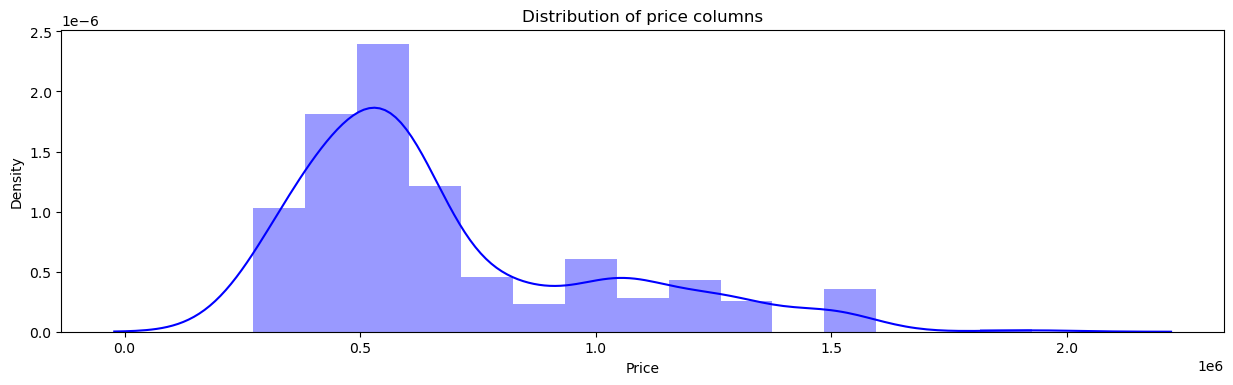

In [65]:
plt.figure(dpi = 100, figsize=(15,4))
sns.distplot(cars_df.Price,color = 'b');
plt.title("Distribution of price columns")
plt.show()

<Figure size 1500x400 with 0 Axes>

(array([ 92., 116.,  49.,  26.,  34.,  18.,  10.,  14.,   0.,   1.]),
 array([ 273299.,  438619.,  603939.,  769259.,  934579., 1099899.,
        1265219., 1430539., 1595859., 1761179., 1926499.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Hist graph of price columns')

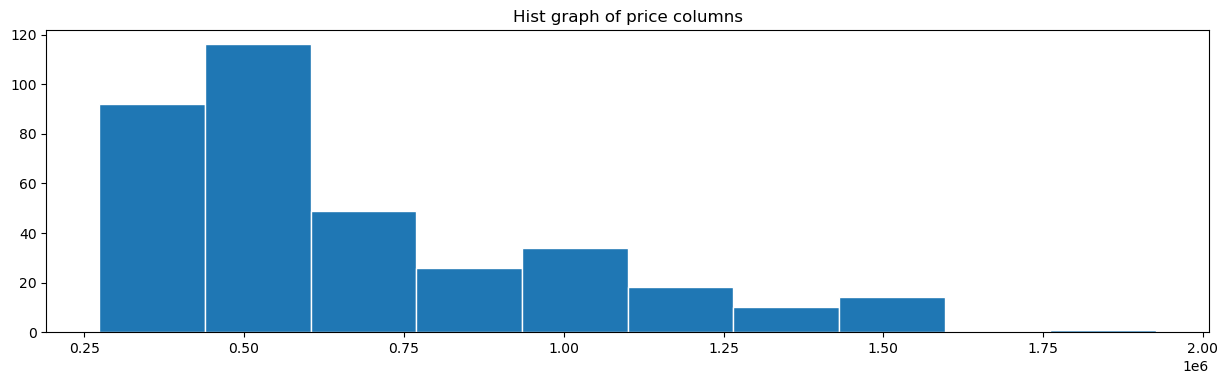

In [66]:
plt.figure(dpi = 100, figsize=(15,4))
plt.hist(cars_df.Price, edgecolor = 'w')
plt.title("Hist graph of price columns")
plt.show()

<Figure size 1500x400 with 0 Axes>

<AxesSubplot:xlabel='MfgYear', ylabel='count'>

Text(0.5, 1.0, 'count plot of Mfg years')

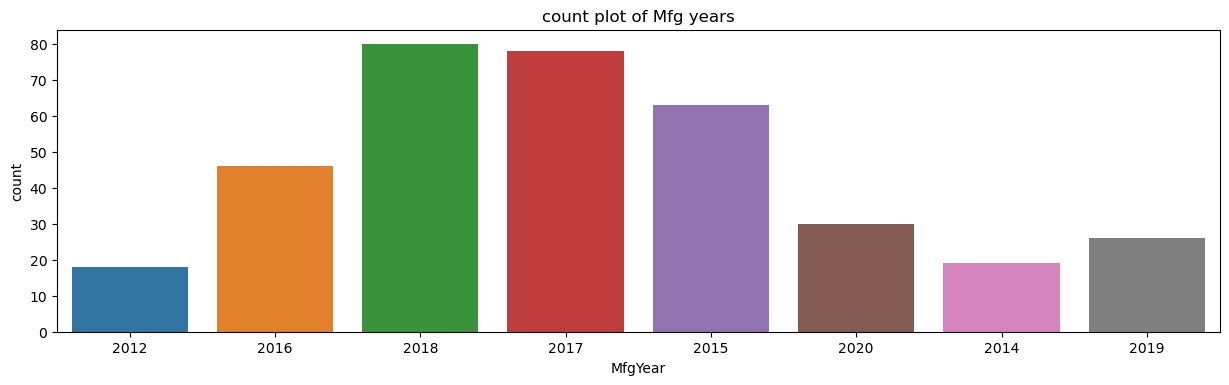

In [67]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(cars_df.MfgYear);
plt.title("count plot of Mfg years")
plt.show()

<Figure size 1500x400 with 0 Axes>

<AxesSubplot:xlabel='OwnerType', ylabel='count'>

Text(0.5, 1.0, 'count plot of Owner type')

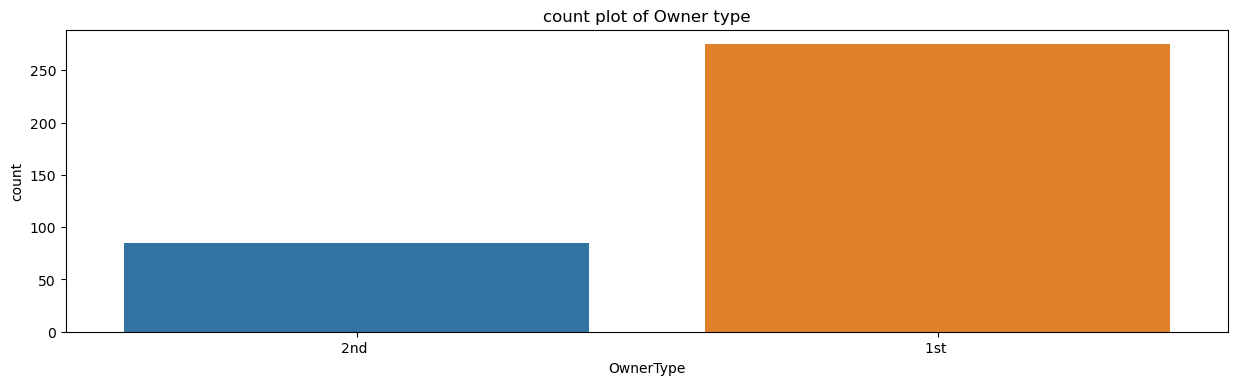

In [68]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(cars_df.OwnerType);
plt.title("count plot of Owner type")
plt.show()

<Figure size 1500x400 with 0 Axes>

<AxesSubplot:xlabel='GearType', ylabel='count'>

Text(0.5, 1.0, 'count plot of Geartype')

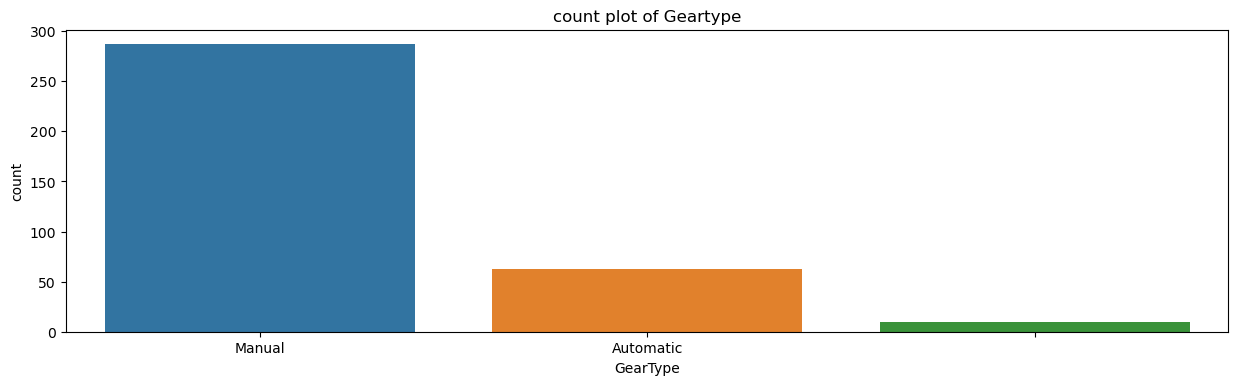

In [153]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(cars_df.GearType);
plt.title("count plot of Geartype")
plt.show()

<Figure size 1500x400 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='count'>

Text(0.5, 1.0, 'count plot of Brand')

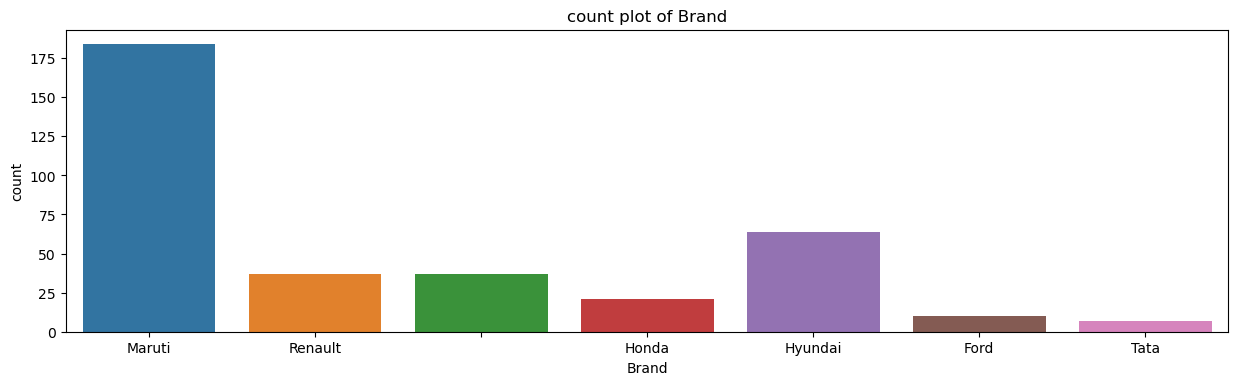

In [69]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(cars_df.Brand);
plt.title("count plot of Brand")
plt.show()


* ##### Bivariate analysis

<Figure size 1500x700 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

Text(0.5, 1.0, 'Box plot of Brand&Price')

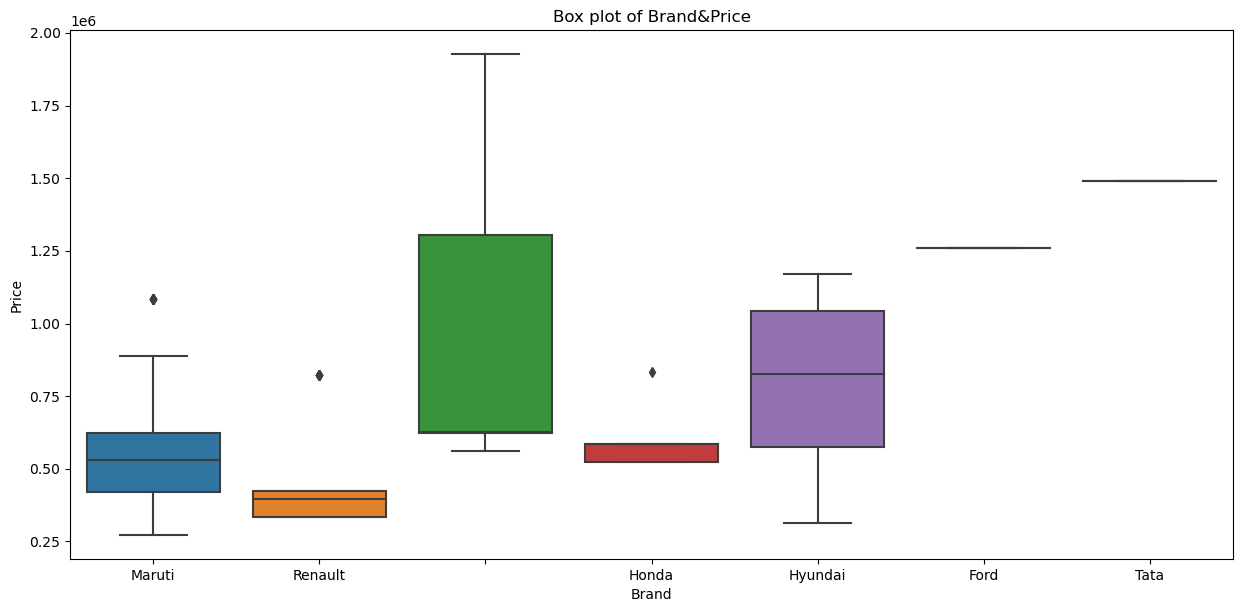

In [70]:
plt.figure(dpi = 100, figsize=(15,7))
sns.boxplot(x = cars_df.Brand, y = cars_df.Price);
plt.title("Box plot of Brand&Price")
plt.show()


<Figure size 1800x1200 with 0 Axes>

Text(0.5, 1.0, 'violin plot of Brand&Price')

<Figure size 1800x1200 with 0 Axes>

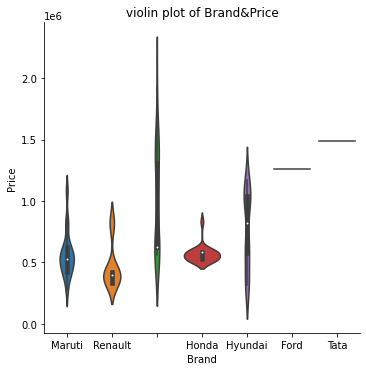

In [71]:
plt.figure(dpi = 300)
sns.catplot(x="Brand", y="Price", data = cars_df, kind='violin');
plt.title("violin plot of Brand&Price")
plt.show()

<AxesSubplot:>

<AxesSubplot:xlabel='Price', ylabel='Emifacility'>

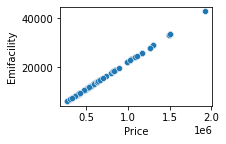

In [168]:
plt.subplot(224)
sns.scatterplot(x="Price", y="Emifacility", data=cars_df)
plt.show()

* ##### Multivariate analysis

<Figure size 360x240 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

<AxesSubplot:>

<AxesSubplot:xlabel='GearType', ylabel='Price'>

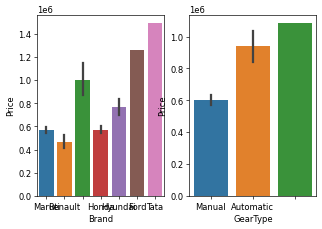

In [72]:
plt.figure(dpi = 60)

plt.subplot(1,2,1)
sns.barplot(x="Brand", y="Price", data = cars_df)

plt.subplot(122)
sns.barplot(x="GearType", y="Price", data = cars_df)

In [171]:
cars_df.corr()

,kmsdriven,Price,Emifacility
kmsdriven,1.000000,-0.040575,-0.040575
Price,-0.040575,1.000000,1.000000
Emifacility,-0.040575,1.000000,1.000000


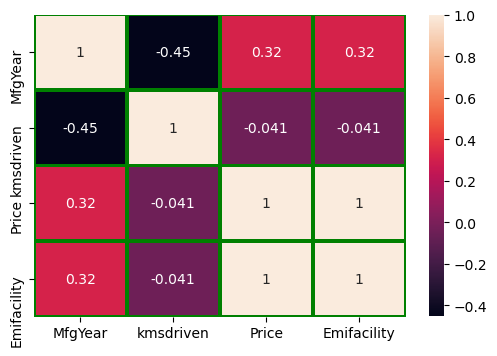

In [184]:
plt.figure(dpi = 100)
sns.heatmap(cars_df.corr(),linecolor='green',linewidths=2,annot=True);

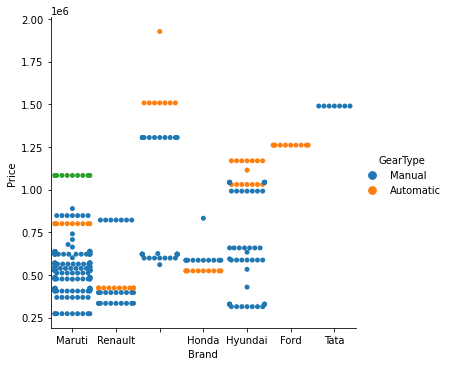

In [177]:
sns.catplot(x="Brand", y="Price", hue="GearType", kind="swarm", data=cars_df);

<Figure size 600x400 with 0 Axes>

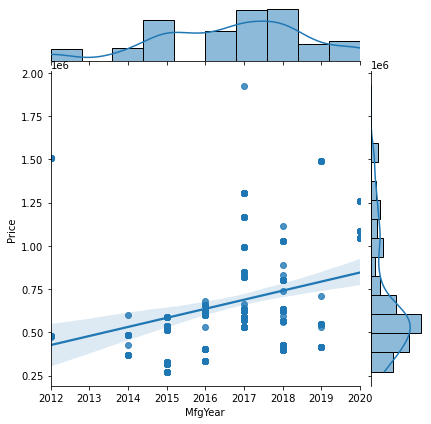

In [183]:
plt.figure(dpi = 100)
sns.jointplot(x='MfgYear',y='Price',data=cars_df,kind='reg');

<Figure size 600x400 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='GearType', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:xlabel='kmsdriven', ylabel='Price'>

<Figure size 600x400 with 0 Axes>

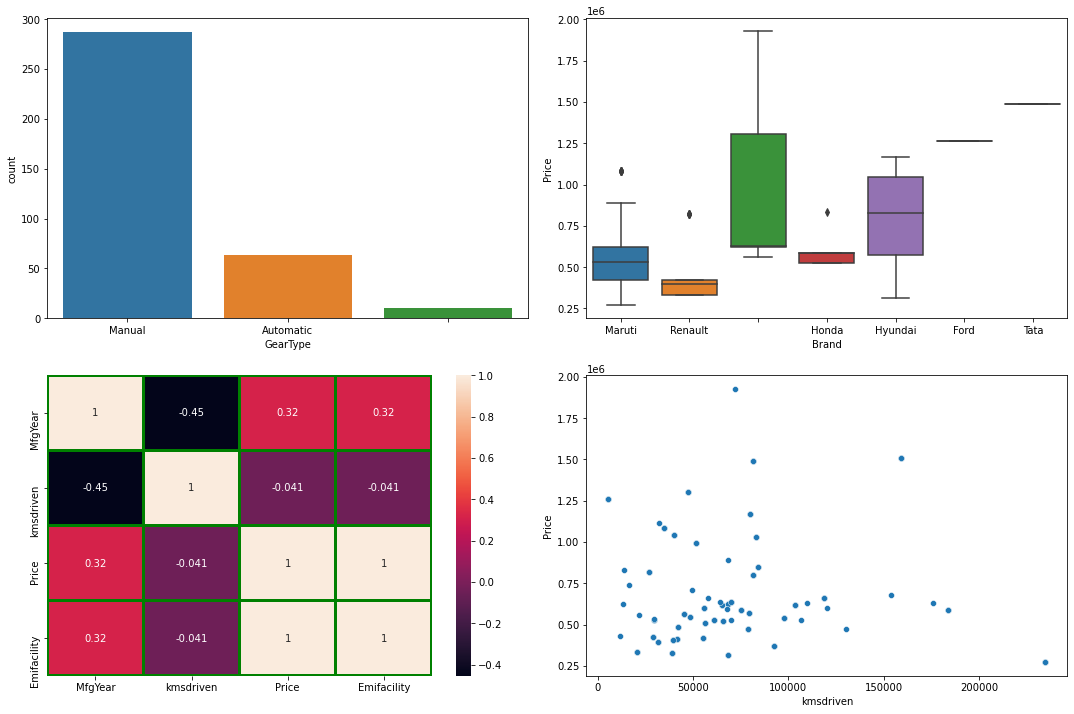

In [185]:
plt.figure(dpi = 100)
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.countplot(x='GearType',data=cars_df)

plt.subplot(222)
sns.boxplot(x="Brand", y="Price", data = cars_df)

plt.subplot(223)
sns.heatmap(cars_df.corr(),linecolor='green',linewidths=2,annot=True);

plt.subplot(224)
sns.scatterplot(x="kmsdriven", y="Price", data=cars_df)

plt.tight_layout(pad= 1.0, w_pad=1.5, h_pad=1.5)

plt.show()

<Figure size 7200x4800 with 0 Axes>

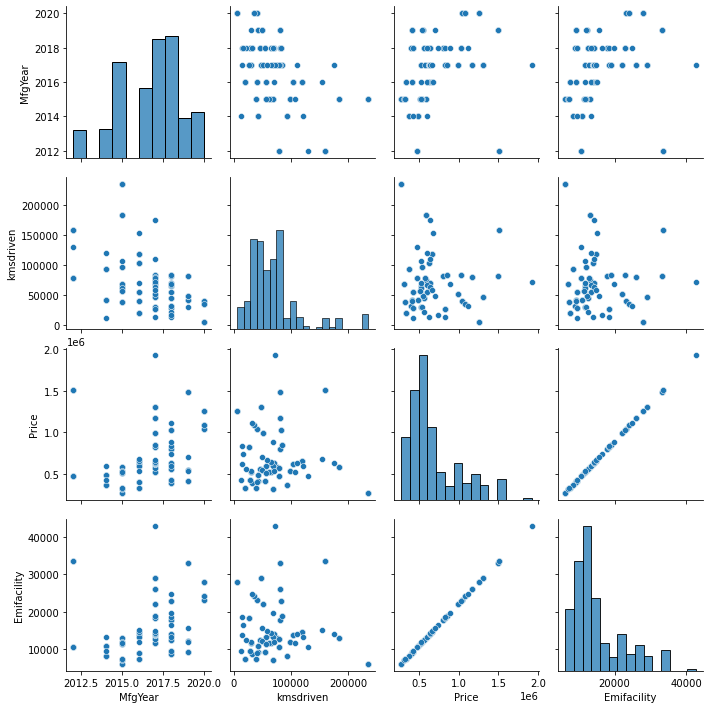

In [189]:
plt.figure(dpi = 1200)
sns.pairplot(cars_df);

<Figure size 7200x4800 with 0 Axes>

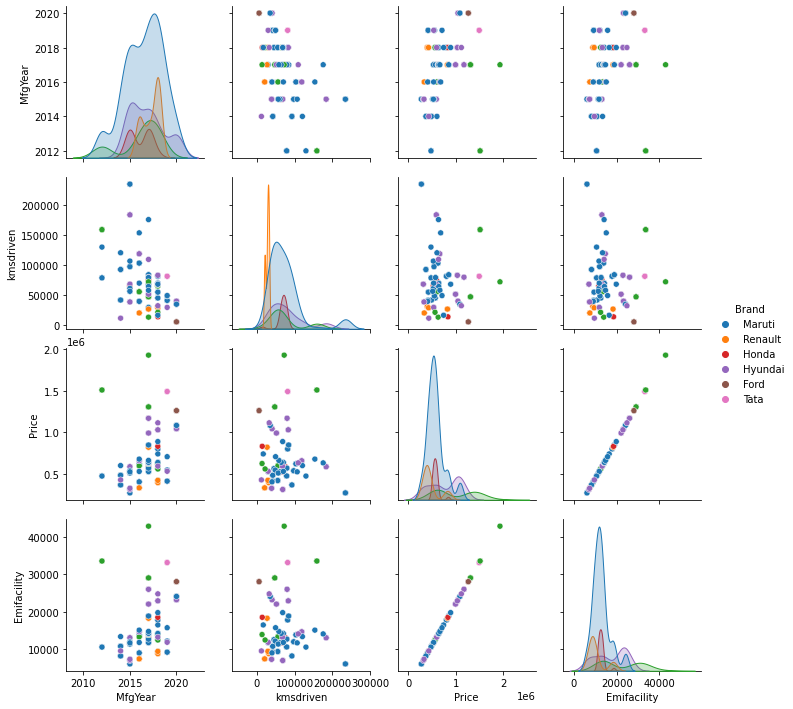

In [191]:
plt.figure(dpi = 1200)
sns.pairplot(cars_df, hue = 'Brand');

#### Usecases

In [204]:
cars_df.groupby('Brand').max()['Price']  # maximum price of each brand in that dataframe

Brand
           1926499.0
Ford       1260699.0
Honda       832499.0
Hyundai    1169099.0
Maruti     1083299.0
Renault     821799.0
Tata       1489899.0
Name: Price, dtype: float64

In [75]:
cars_df.groupby('Brand').min()['Price']  # minimum price of each brand in the dataframe

Brand
            560499.0
Ford       1260699.0
Honda       524199.0
Hyundai     314399.0
Maruti      273299.0
Renault     333899.0
Tata       1489899.0
Name: Price, dtype: float64

In [205]:
cars_df.nlargest(5, 'Price')   # top 5 highest prices cars info 

,Brand,Model,MfgYear,kmsdriven,Price,Emifacility,GearType,OwnerType
343,,ToyotaInnovaCrysta2.8 ZX AT 7 STR,2017.0,72222.0,1926499.0,42854.0,Automatic,2nd
52,,ToyotaFortuner3.0 AT 4X2,2012.0,158977.0,1508199.0,33549.0,Automatic,2nd
172,,ToyotaFortuner3.0 AT 4X2,2012.0,158977.0,1508199.0,33549.0,Automatic,2nd
192,,ToyotaFortuner3.0 AT 4X2,2012.0,158977.0,1508199.0,33549.0,Automatic,2nd
212,,ToyotaFortuner3.0 AT 4X2,2012.0,158977.0,1508199.0,33549.0,Automatic,2nd


In [206]:
cars_df.nsmallest(5, 'Price')   # top5 lowest prices cars info

,Brand,Model,MfgYear,kmsdriven,Price,Emifacility,GearType,OwnerType
16,Maruti,AltoKVXI,2015.0,234695.0,273299.0,6079.0,Manual,1st
36,Maruti,AltoKVXI,2015.0,234695.0,273299.0,6079.0,Manual,1st
76,Maruti,AltoKVXI,2015.0,234695.0,273299.0,6079.0,Manual,1st
96,Maruti,AltoKVXI,2015.0,234695.0,273299.0,6079.0,Manual,1st
116,Maruti,AltoKVXI,2015.0,234695.0,273299.0,6079.0,Manual,1st


In [209]:
cars_df.loc[0:5, 'Model']    # extracting first five model cars by using loc

0                           SwiftZDI 
1                        Kwid1.0 RXT 
2    VolkswagenAmeoHIGHLINE PLUS 1.0 
3       SkodaOctaviaStyle 1.4 TSI MT 
4                 BalenoZETA 1.2 K12 
5                       Jazz1.2 V AT 
Name: Model, dtype: object

In [214]:
cars_df.loc[[5,7,9], ['Brand', 'Model' ,'Price']]   # extracting a specific dataset


,Brand,Model,Price
5,Honda,Jazz1.2 V AT,524199.0
7,Hyundai,VENUE1.5 SX CRDI MT,1042799.0
9,Maruti,SwiftLXI,528999.0


##### Get the Minimum maximum and Mean Price with relate to Brand

In [78]:
cars_df.groupby(['Brand'], as_index=False).agg({'Price':['min', 'max', 'mean']})

Brand      Price                         
                  min        max          mean
0            560499.0  1926499.0  1.003745e+06
1     Ford  1260699.0  1260699.0  1.260699e+06
2    Honda   524199.0   832499.0  5.684990e+05
3  Hyundai   314399.0  1169099.0  7.702099e+05
4   Maruti   273299.0  1083299.0  5.655164e+05
5  Renault   333899.0   821799.0  4.676368e+05
6     Tata  1489899.0  1489899.0  1.489899e+06

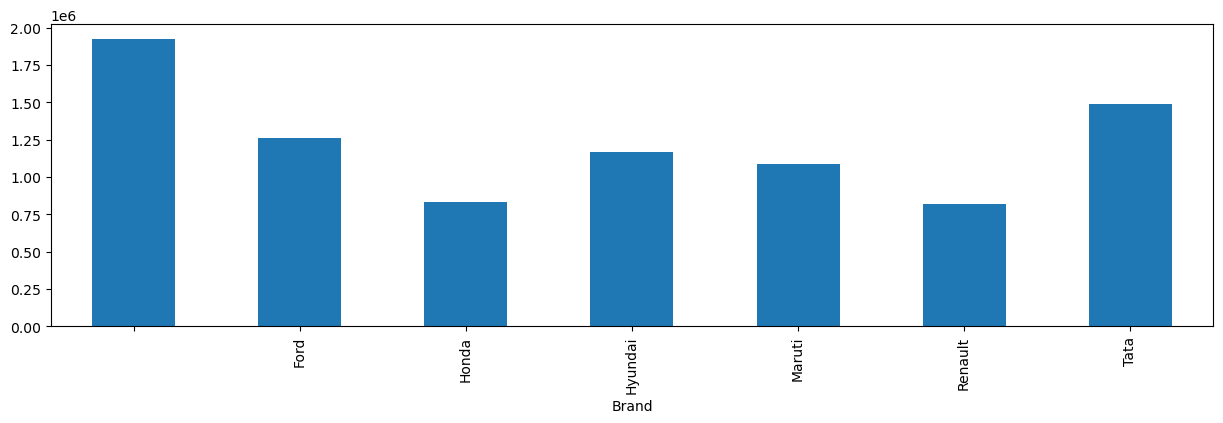

In [79]:
plt.figure(dpi = 100, figsize=(15,4))
cars_df.groupby(['Brand'])['Price'].max().plot(kind = 'bar');

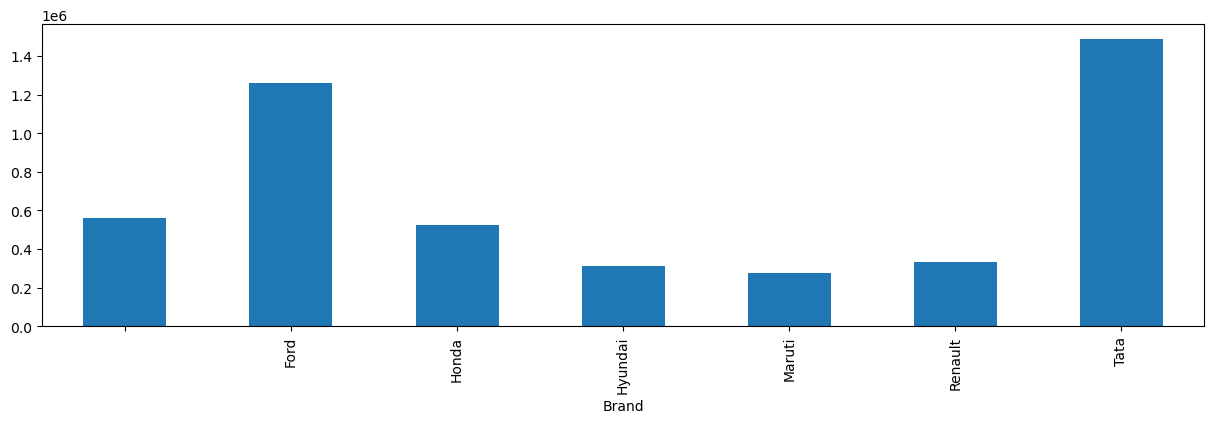

In [80]:
plt.figure(dpi = 100, figsize=(15,4))
cars_df.groupby(['Brand'])['Price'].min().plot(kind = 'bar');

##### Get the Minimum maximum and Mean Price with relate to MfgYear

In [81]:
cars_df.groupby(['MfgYear'], as_index=False).agg({'Price':['min', 'max', 'mean']})

MfgYear      Price                         
                 min        max          mean
0    2012   475299.0  1508199.0  8.777601e+05
1    2014   368799.0   601199.0  4.454674e+05
2    2015   273299.0   587299.0  4.468546e+05
3    2016   333899.0   678999.0  5.137447e+05
4    2017   528999.0  1926499.0  8.269375e+05
5    2018   397199.0  1114199.0  6.087678e+05
6    2019   414499.0  1489899.0  7.556221e+05
7    2020  1042799.0  1260699.0  1.128932e+06

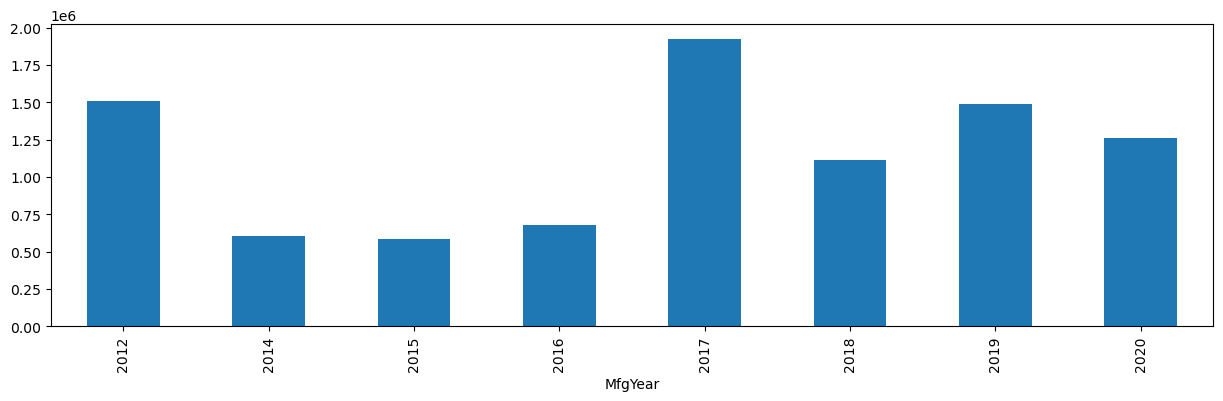

In [82]:
plt.figure(dpi = 100, figsize=(15,4))
cars_df.groupby(['MfgYear'])['Price'].max().plot(kind = 'bar');

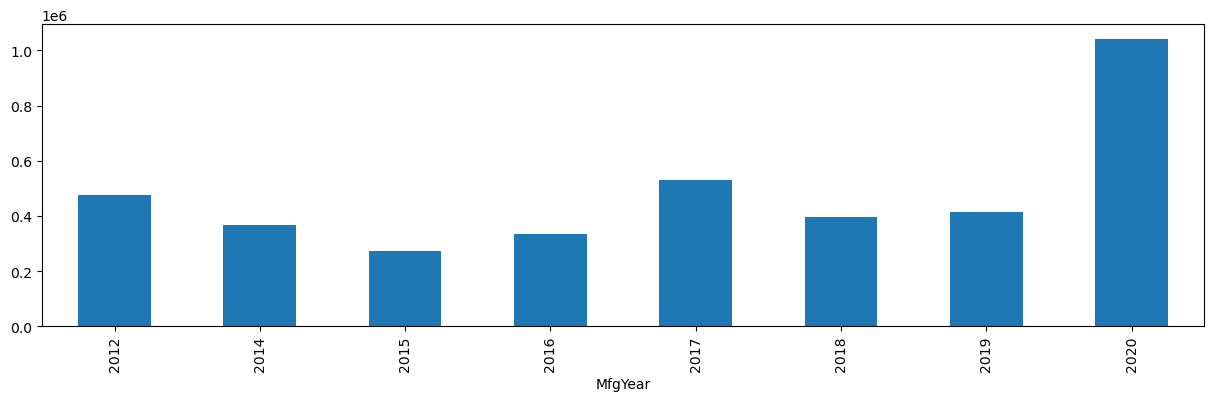

In [83]:
plt.figure(dpi = 100, figsize=(15,4))
cars_df.groupby(['MfgYear'])['Price'].min().plot(kind = 'bar');